# Reporting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_country = pd.read_json('../data/results/country_analysis.json')
df_opinion = pd.read_json('../data/results/opinion_analysis.json')
df_edu = pd.read_json('../data/results/edu_level_analysis.json')

In [1]:
country = 'Spain'

In [2]:
if country == '':
    tit1 = 'European gender distribution'
    tit2 = 'European vote intention'
    tit3 = 'European top jobs / education level'
else:
    tit1 = f'Gender distribution for {country}'
    tit2 = f'Vote intention for {country}'
    tit3 = f'Top jobs/education level in {country}'

### By country:

In [3]:
df_country.head()

,Country,Job title,Gender,Quantity,Country percentage ‰
2350,Spain,Analytical Data Miner,Male,1,0.995025
2351,Spain,Automatic Data Processing Customer Liaison (AD...,Female,5,4.975124
2352,Spain,Automatic Data Processing Customer Liaison (AD...,Male,6,5.970149
2353,Spain,Automatic Data Processing Planner,Female,5,4.975124
2354,Spain,Automatic Data Processing Planner,Male,4,3.980100


In [4]:
g = df_country[['Gender', 'Quantity']].set_index('Gender').groupby('Gender').sum().reset_index()

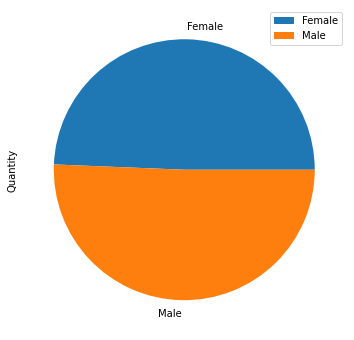

In [5]:
ax = g.set_index('Gender').plot.pie(y = 'Quantity', x = 'Gender', figsize = (6,6))

In [6]:
fig = ax.get_figure()
fig.savefig('../data/reporting/gender_distribution.jpeg')

### Opinion

In [7]:
df_opinion.head()

,Vote_intention,Number_of_votes,Number_pro_arguments,Number_con_arguments
0,I would not vote,1159,1359,1540
1,I would probably vote against it,1439,1997,3786
2,I would probably vote for it,3272,6044,6612
3,I would vote against it,960,1159,2895
4,I would vote for it,2819,6175,4922


In [8]:
h = df_opinion[['Vote_intention', 'Number_of_votes']].reset_index()

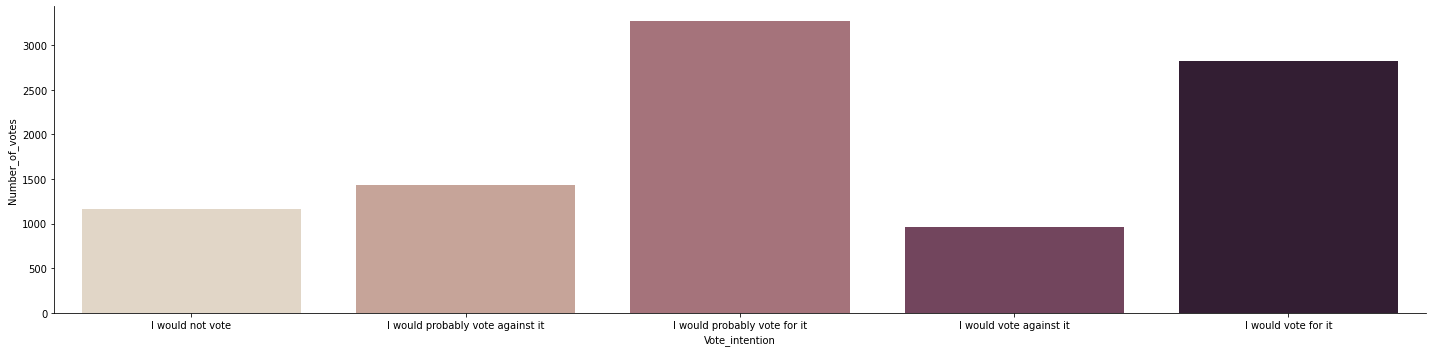

In [9]:
bx = sns.catplot(x = 'Vote_intention', y = 'Number_of_votes', kind = 'bar', aspect = 4, palette="ch:.25", data=h);

In [10]:
bx.savefig('../data/reporting/vote_intention.jpeg')

### Education

In [11]:
df_edu

,Job_title,Total,Education_level
0,Data Administrator,47,High
1,Data Officer,44,High
2,Computer or Data Processing Systems Consultant,43,High
3,Data Storage Specialist,41,Medium
4,Geographic Information Systems Data Specialist...,38,Medium
5,Data Officer,37,Medium
6,Data Processing Systems Analyst,18,Low
7,Data Communications Software Consultant,17,Low
8,Automatic Data Processing Systems Security Spe...,16,Low
9,Data Scientist,8,No


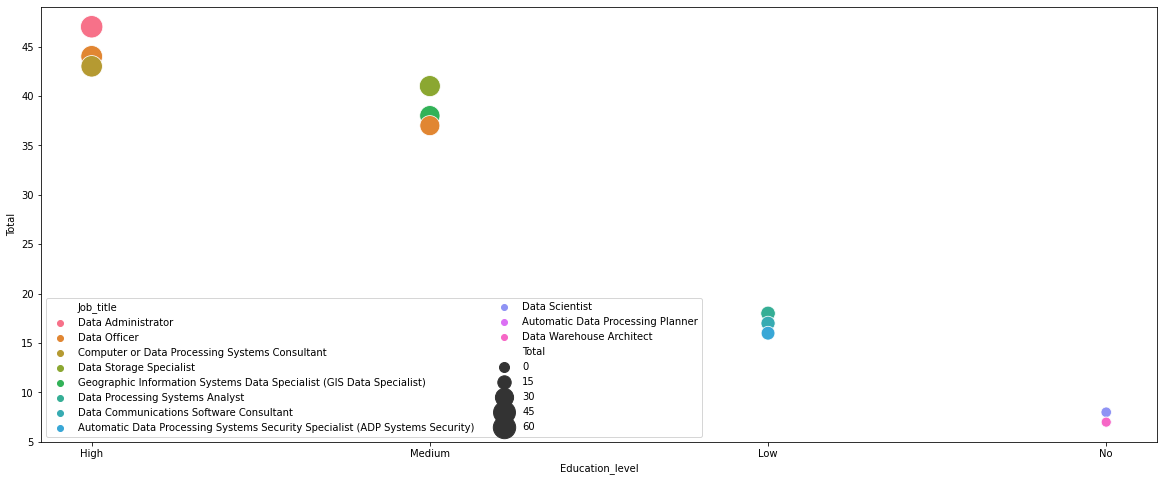

In [12]:
plt.figure(figsize=(20, 8))
cx = sns.scatterplot(x="Education_level", y="Total",
                     hue="Job_title", size="Total",sizes=(100, 500), legend = 'brief', data=df_edu)
lgn = cx.legend(loc='lower left',  ncol=2)

In [13]:
cx.figure.savefig('../data/reporting/top_education_jobs.jpeg')


### Creating pdf

In [14]:
from PIL import Image

In [15]:
img1 = Image.open('../data/reporting/gender_distribution.jpeg')
img2 = Image.open('../data/reporting/vote_intention.jpeg')
img3 = Image.open('../data/reporting/top_education_jobs.jpeg')

In [16]:
img1.save(r'../data/reporting/reporting.pdf',save_all=True, append_images=[img2, img3])

### Sending by email

In [23]:
# libraries to be imported 
import smtplib 
from email.mime.multipart import MIMEMultipart 
from email.mime.text import MIMEText 
from email.mime.base import MIMEBase 
from email import encoders 
   
fromaddr = "p.villamanario@gmail.com" # <--------------------------------------  Cuenta envío
toaddr = "p.villamanario@gmail.com" # <----------------------------------------  Email receptor
   
# instance of MIMEMultipart 
msg = MIMEMultipart() 
  
# storing the senders email address   
msg['From'] = fromaddr 
  
# storing the receivers email address  
msg['To'] = toaddr 
  
# storing the subject  
msg['Subject'] = "Data Project I: Poll analysis."
  
# string to store the body of the mail 
body = '''Hello, 
This is the poll analysis about European Basic Income!
Thanks ;)'''
  
# attach the body with the msg instance 
msg.attach(MIMEText(body, 'plain')) 
  
# open the file to be sent  
filename = "reporting.pdf"
attachment = open("../data/reporting/reporting.pdf", "rb")  # <--------------------------------------  Attachements
  
# instance of MIMEBase and named as p 
p = MIMEBase('application', 'octet-stream') 
  
# To change the payload into encoded form 
p.set_payload((attachment).read()) 
  
# encode into base64 
encoders.encode_base64(p) 
   
p.add_header('Content-Disposition', "attachment; filename= %s" % filename) 
  
# attach the instance 'p' to instance 'msg' 
msg.attach(p) 
  
# creates SMTP session 
s = smtplib.SMTP('smtp.gmail.com', 587) 
  
# start TLS for security 
s.starttls() 
  
# Authentication 
s.login(fromaddr, "_________") # <----------------------------------------  Contraseña de aplicación
  
# Converts the Multipart msg into a string 
text = msg.as_string() 
  
# sending the mail 
s.sendmail(fromaddr, toaddr, text) 
  
# terminating the session 
s.quit() 

SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. Learn more at\n5.7.8  https://support.google.com/mail/?p=BadCredentials p25sm16407073wmg.39 - gsmtp')